# Netfilx 데이터
- 한국 작품은 총 얼마나 있는가?
    - country column을 기준으로 한다.
    - "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [1]:
# data import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv 파일 불러오기

In [4]:
df_netfilx = pd.read_csv('./netflix_titles.csv')
df_netfilx.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#### netfilx 데이터 파악


데이터 shape

In [6]:
df_netfilx.shape

(7787, 12)

데이터 columns 

In [5]:
df_netfilx.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df_netfilx['country'].unique()

한국 작품은 총 몇개나 있는가?

In [29]:
df_korea = df_netfilx[df_netfilx['country'] == 'South Korea']
df_korea.shape[0]

183

In [46]:
tmp = df_netfilx['show_id'].groupby(by=df_netfilx['country']).count()
tmp.loc['South Korea']

183

답 : 183 개


### Bonus Part
- 가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
- country column을 기준으로 한다.
- 단일 국가인 경우를 기준으로 결과를 구해보자.

In [41]:
# 단일 국가 추출하기
country_list = set()
for val in df_netfilx['country'].unique():
    try:
        # set.add() 는 1개의 값만 추가 가능
        country_list.add(*val.split(', '))
    except:
        # 단일국가가 아니거나, nan 타입의 경우 무시
        continue
country_list

{'Argentina',
 'Australia',
 'Austria',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Croatia',
 'Cyprus',
 'Denmark',
 'Egypt',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Ghana',
 'Guatemala',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Jordan',
 'Kenya',
 'Kuwait',
 'Lebanon',
 'Malaysia',
 'Mexico',
 'Namibia',
 'Netherlands',
 'New Zealand',
 'Nigeria',
 'Norway',
 'Pakistan',
 'Peru',
 'Philippines',
 'Poland',
 'Poland,',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'Senegal',
 'Singapore',
 'South Africa',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'Taiwan',
 'Thailand',
 'Turkey',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom',
 'United Kingdom,',
 'United States',
 'United States,',
 'Uruguay',
 'Venezuela',
 'Vietnam',
 'West Germany',
 'Zimbabwe'}

In [71]:
# 단일 국가의 Dataframe 추출
mask = df_netfilx['country'].isin(country_list)
df_masked = df_netfilx[mask]
df_masked.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [85]:
tmp = df_masked['show_id'].groupby(df_masked['country']).count()
tmp.sort_values(ascending=False)

country
United States     2555
India              923
United Kingdom     397
Japan              226
South Korea        183
                  ... 
Senegal              1
Poland,              1
Jordan               1
West Germany         1
Zimbabwe             1
Name: show_id, Length: 72, dtype: int64

#### 결론 : 가장 많은 작품이 올라간 국가는 **'United States'** 이고 작품수는 **2555** 이다.

## Mission 2. 가즈아!

### Mandatory Part
다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 5-MA(Moving Average) 비트코인 가격 그래프를 그려주세요.
- 선의 색깔은 노란색(#f2a900) 으로 해야합니다.
- x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 Open Column으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

비트코인 데이터 불러오기

In [228]:
df_coin = pd.read_csv('./BitCoin.csv',index_col='Date',parse_dates=['Date'])
df_coin.head(3)

,Unnamed: 0,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,,
2017-09-22,0,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
2017-09-21,1,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2017-09-20,2,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000


데이터 확인

In [220]:
df_coin.shape

(1609, 7)

In [221]:
df_coin.columns

Index(['Unnamed: 0', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [222]:
df_coin.dtypes

Unnamed: 0      int64
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap      int64
dtype: object

2016.06 ~ 2017.06 기간데이터 추출

In [229]:
df_coin = df_coin.loc['2016-06-01' : '2017-06-30']['Open']
df_coin = df_coin.sort_index()
df_coin

Date
2016-06-01     431.86
2016-06-02     386.59
2016-06-03     400.52
2016-06-04     424.28
2016-06-05     447.94
               ...   
2017-06-26    2590.57
2017-06-27    2478.45
2017-06-28    2553.03
2017-06-29    2567.56
2017-06-30    2539.24
Name: Open, Length: 377, dtype: float64

5-MA(Moving Average) 구하기
- `rolling(N)` : N 은 기간 

In [230]:
df_5ma = df_coin.rolling(5).mean()
df_5ma

Date
2016-06-01         NaN
2016-06-02         NaN
2016-06-03         NaN
2016-06-04         NaN
2016-06-05     418.238
                ...   
2017-06-26    2666.942
2017-06-27    2624.426
2017-06-28    2593.564
2017-06-29    2559.372
2017-06-30    2545.770
Name: Open, Length: 377, dtype: float64

5-MA 를 구해서 4개의 결측치 값이 생긴것을 확인
- 시각화를 위해서 Nan값을 drop 하기로 결정
- `dropna()` 사용

In [232]:
df_5ma = df_5ma[4:]
df_5ma

Date
2016-06-05     418.238
2016-06-06     446.786
2016-06-07     503.552
2016-06-08     538.454
2016-06-09     574.900
                ...   
2017-06-26    2666.942
2017-06-27    2624.426
2017-06-28    2593.564
2017-06-29    2559.372
2017-06-30    2545.770
Name: Open, Length: 373, dtype: float64

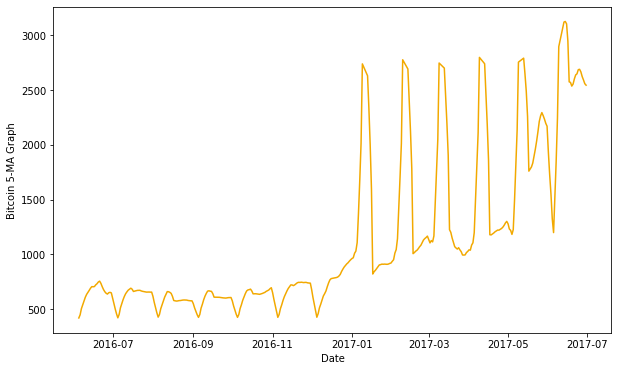

In [280]:
plt.figure(figsize=(10,6))
plt.plot(df_5ma,'#f2a900')
plt.xlabel('Date')
plt.ylabel('Bitcoin 5-MA Graph')
plt.show()

### Bonus Part
-  이더리움 그래프 같이 그리기

In [283]:
df_ider = pd.read_csv('./ETH_day.csv', index_col='Date',parse_dates=['Date'])
df_ider.head()

,Symbol,Open,High,Low,Close,Volume ETH,Volume USD
Date,,,,,,,
2020-04-15,ETHUSD,158.61,158.61,158.61,158.61,0.00,0.00
2020-04-14,ETHUSD,156.97,162.15,155.74,158.61,18061.58,2872210.44
2020-04-13,ETHUSD,158.56,159.51,150.12,156.97,15698.32,2416728.28
2020-04-12,ETHUSD,158.66,165.37,155.21,158.56,12877.33,2082804.05
2020-04-11,ETHUSD,158.26,161.49,154.25,158.66,13761.72,2172914.57


In [284]:
df_ider = df_ider.sort_index()
df_ider = df_ider['2016-06-01' : '2017-06-30']['Open']
df_ider

Date
2016-06-01     14.18
2016-06-02     13.95
2016-06-03     13.90
2016-06-04     14.02
2016-06-05     13.86
               ...  
2017-06-26    278.73
2017-06-27    253.00
2017-06-28    286.21
2017-06-29    317.59
2017-06-30    293.80
Name: Open, Length: 395, dtype: float64

In [285]:
df_ider = df_ider.rolling(5).mean()[4:]
df_ider

Date
2016-06-05     13.982
2016-06-06     13.928
2016-06-07     13.970
2016-06-08     14.090
2016-06-09     14.188
               ...   
2017-06-26    310.850
2017-06-27    296.592
2017-06-28    289.898
2017-06-29    288.066
2017-06-30    285.866
Name: Open, Length: 391, dtype: float64

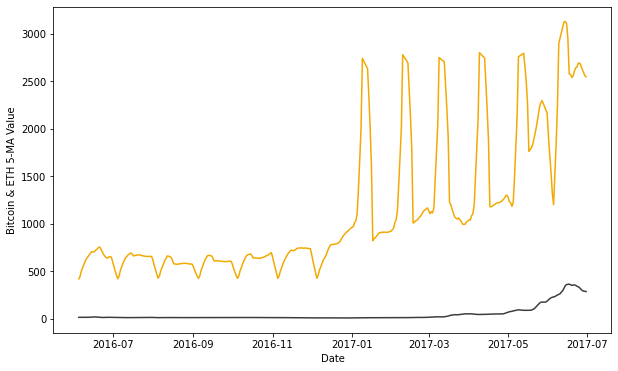

In [289]:
plt.figure(figsize=(10,6))
plt.plot(df_5ma,'#f2a900', df_ider,'#3c3c3d')
plt.xlabel('Date')
plt.ylabel('Bitcoin & ETH 5-MA Value')
plt.show()